In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import sys


import macd
import pandas.io.data as web
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline
filename='source/snp500.h5'
path='data/dfs.h5'

In [2]:

h5 = pd.HDFStore(filename, 'r')
symbols=macd.getSymbols(h5)[0:10]
print symbols




['AAP', 'AMZN', 'AN', 'AZO', 'BBBY', 'BBY', 'BWA', 'CBS', 'CCL', 'CMCSA']


In [3]:


for y in range(2005,2011):
    s=str(y)+'-01-01'
    e=str(y)+'-12-31'
    print s,e
    df=macd.parallelCumsum(filename, symbols,s,e,procs=None)

    with pd.get_store(path) as store:
        store[str(y)]=df

2005-01-01 2005-12-31
2006-01-01 2006-12-31
2007-01-01 2007-12-31
2008-01-01 2008-12-31
2009-01-01 2009-12-31
2010-01-01 2010-12-31


In [4]:
#path='/home/ruslan/data/dfs.h5'
#start='2011-01-01'
#end=None
#df=macd.parallelCumsum(filename, symbols,start,end,procs=1) 

#with pd.get_store(path) as store:
#    store['2011']=df    

In [5]:
with pd.get_store(path) as store:
    df1=store
    print df1.keys()


['/2005', '/2006', '/2007', '/2008', '/2009', '/2010']


In [7]:
with pd.get_store(path) as store:
    df1=store['/2010']
    print df1.keys()

Index([u'buyhold', u'meanpct', u'ntrades', u'rmsepct', u'strategy', u'sym',
       u'totwinpct', u'win'],
      dtype='object')


In [8]:
with pd.get_store(path) as store:
    df1=store['/2005']
    print df1.loc[(df1['win']>70.0)]

       buyhold   meanpct  ntrades    rmsepct  strategy   sym  totwinpct  \
BBBY  0.905788  7.336063       24   8.711722  1.415117  BBBY  44.616183   
AZO   1.011019  9.080972       21  10.885056  1.160952   AZO  13.828115   

            win  
BBBY  78.968254  
AZO   76.587302  


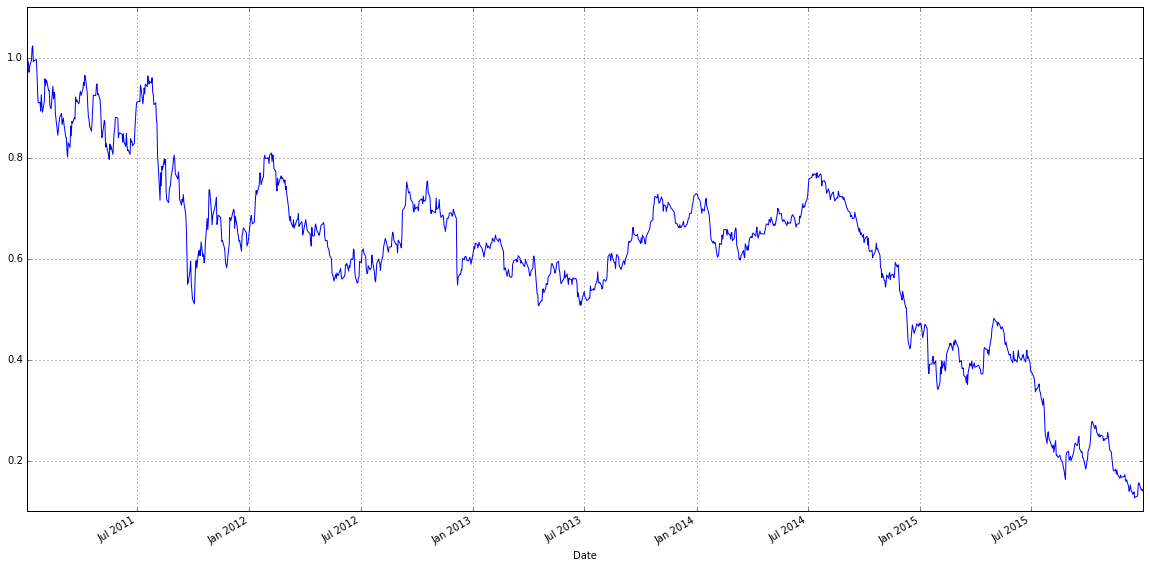

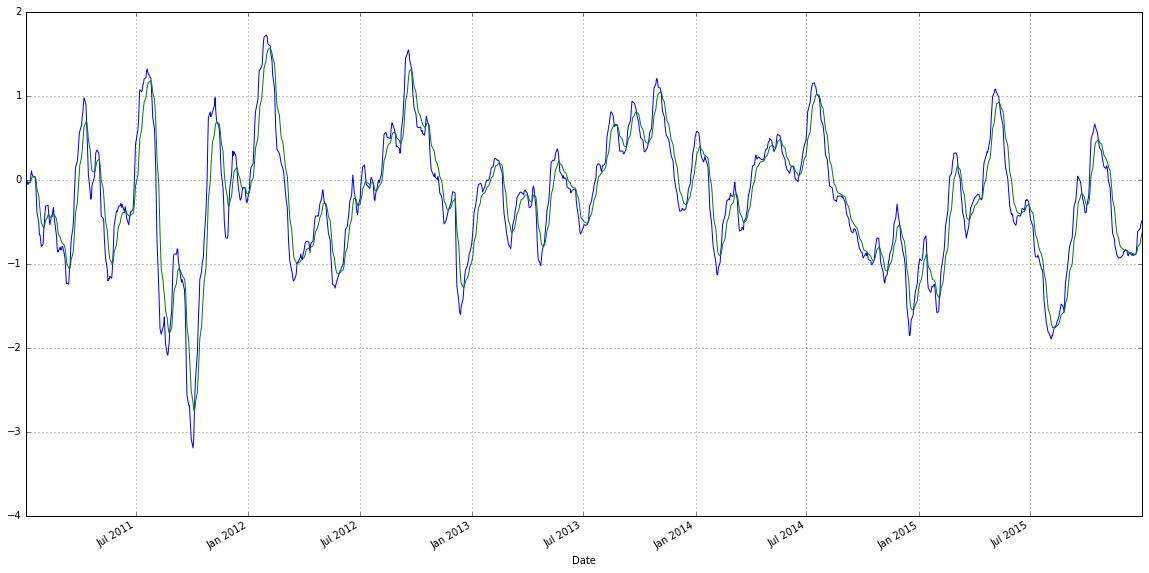

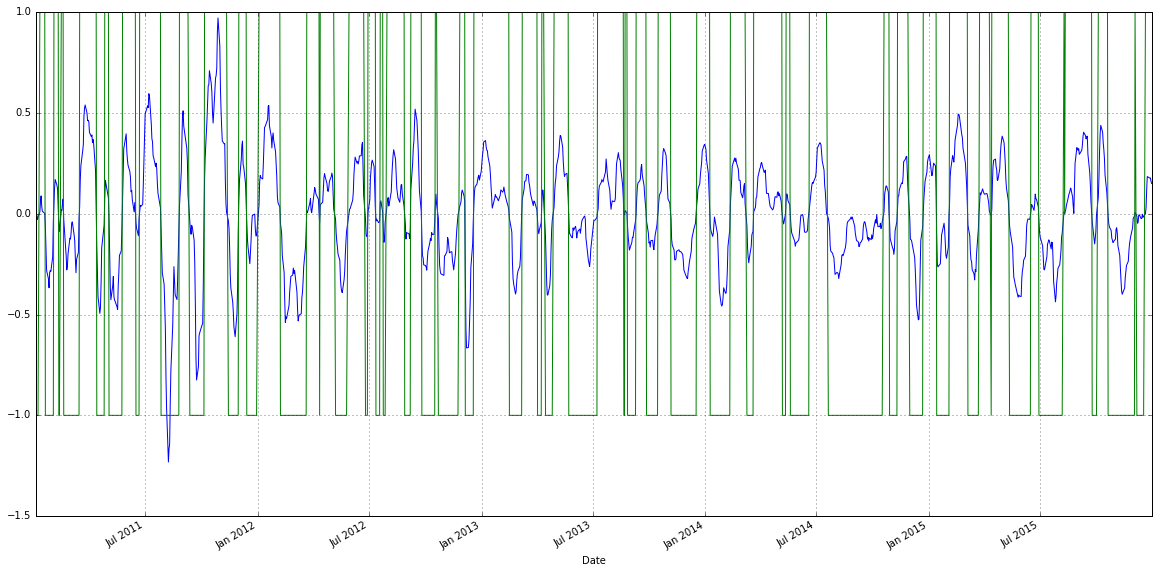

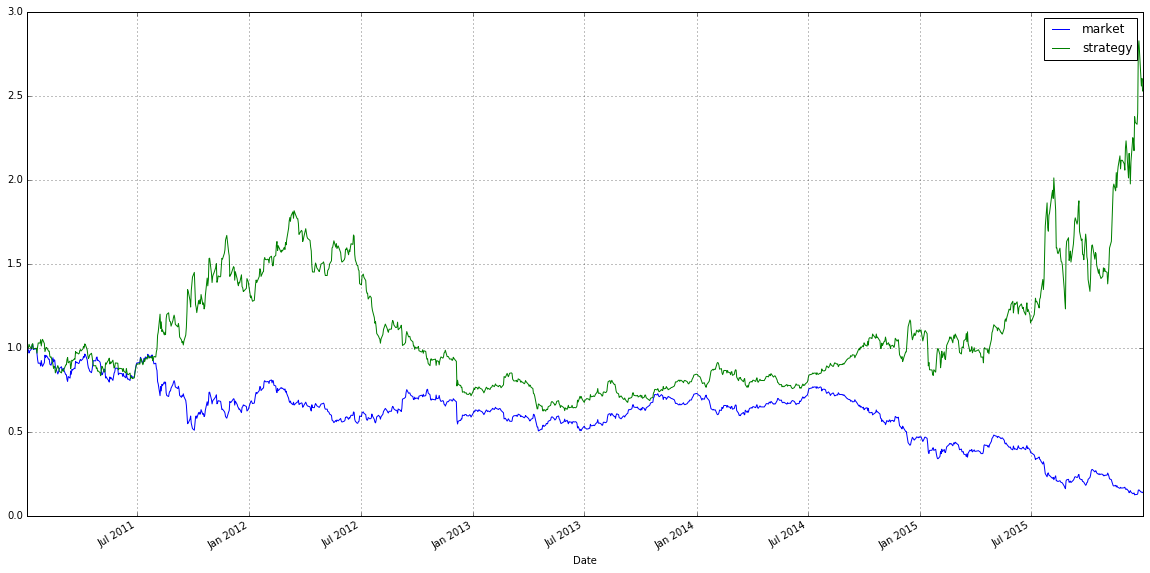

In [9]:
start='2011-01-01'
dt0=macd.getClose(h5,'FCX')[start:]

dt = macd.macd(dt0) 
dcs,res=macd.doCumsum(dt)
macd.plotMacd(dt)

In [ ]:
print res